# Search: Solving a Maze Using a Goal-based Agent


## Instructions

Total Points: Undegraduates 10, graduate students 11

Complete this notebook and submit it. The notebook needs to be a complete project report with 

* your implementation,
* documentation including a short discussion of how your implementation works and your design choices, and
* experimental results (e.g., tables and charts with simulation results) with a short discussion of what they mean. 

Use the provided notebook cells and insert additional code and markdown cells as needed.


## Introduction

The agent has a map of the maze it is in (i.e., the environment is deterministic, discrete, and known). The agent must use the map to plan a path through the maze from the starting location $S$ to the goal location $G$.  

This is a planing exercise for a goal-based agent, so you do not need to implement an environment, just use the map to search for a path. Once the plan is made, the agent can just follow the path and does not need percepts. The execution phase is trivial and we do not implement it in this exercise.

Tree search algorithm implementations that you find online and used in general algorithms courses have often a different aim. These algorithms assume that you already have a tree and the goal is to traverse all nodes. We are interested in dynamically creating a search tree with the aim of finding a good/the best path to the goal state. Follow the pseudo code presented in the text book closely. Ideally, we would like to search only a small part of the maze, i.e., create a search tree with as few nodes as possible. 

Here is the small example maze:

In [1]:
f = open("small_maze.txt", "r")
maze_str = f.read()
print(maze_str)

XXXXXXXXXXXXXXXXXXXXXX
X XX        X X      X
X    XXXXXX X XXXXXX X
XXXXXX     S  X      X
X    X XXXXXX XX XXXXX
X XXXX X         X   X
X        XXX XXX   X X
XXXXXXXXXX    XXXXXX X
XG         XX        X
XXXXXXXXXXXXXXXXXXXXXX



__Note:__ The mazes above contains cycles and therefore search may not form proper trees unless cycles are prevented. You need to deal with cycle detection in your code.

## Parsing and pretty printing the maze

The maze can also be displayed in color using code in the file [maze_helper.py](maze_helper.py). The code parses the string representing the maze and converts it into a `numpy` 2d array which you can use in your implementation. I represent a position as a 2-tuple of the form `(row, col)`. 

In [2]:
%run maze_helper.py

maze = parse_maze(maze_str)

# look at two positions in the maze
print("Position(0,0):", maze[0, 0])

# there is also a helper function called `look(maze, pos)`
print("Position(8,1):", look(maze, (8, 1)))

Position(0,0): X
Position(8,1): G


Visualize the maze

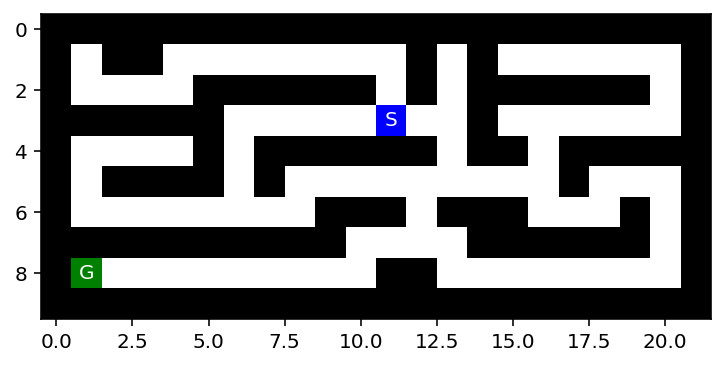

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# use higher resolution images in notebook

show_maze(maze)

Find the position of the start and the goal using the helper function `find_pos()`

In [4]:
print("Start location:", find_pos(maze, what = "S"))
print("Goal location:", find_pos(maze, what = "G"))

Start location: (3, 11)
Goal location: (8, 1)


## Tree structure

Here is an implementation of the basic node structure for the search algorithms (see Fig 3.7 on page 73). I have added a method that extracts the path from the root node to the current node. It can be used to get the path when the search is completed.

In [5]:
class Node:
    def __init__(self, pos, parent, action, cost):
        self.pos = tuple(pos)    # the state; positions are (row,col)
        self.parent = parent     # reference to parent node. None means root node.
        self.action = action     # action used in the transition function (root node has None)
        self.cost = cost         # for uniform cost this is the depth. It is also g(n) for A* search

    def __str__(self):
        return f"Node - pos = {self.pos}; action = {self.action}; cost = {self.cost}"
    
    def get_path_from_root(self):
        """returns nodes on the path from the root to the current node."""
        node = self
        path = [node]
    
        while not node.parent is None:
            node = node.parent
            path.append(node)
        
        path.reverse()
        
        return(path)

If needed, then you can add more fields to the class.


__Tree and memory management example:__ Create the root node and append the node for going east with a cost of 1.

In [6]:
import sys

print("Create root node")
root = Node(pos = (0,0), parent = None, action = None, cost = 0)
print("root:", root)
print("root (reference):", repr(root))

print()
print("Go east with cost 1 (from the parent root)")
node2 = Node(pos = (0,1), parent = root, action = "E", cost = 1)
print("node2:", node2)
print("parent of node2: ", node2.parent)
print("parent of node2 (reference): ", repr(node2.parent))
# Note: -1 is used because passing root to getrefcount adds one reference
print("Root is now referenced twice. Reference count for garbage collection (root node):", sys.getrefcount(root)-1)

print()
print("Note that the root node is safe from garbage collection as long as we have also a reference in node2") 
root = None
print(root)
print("parent of node2 (reference to root node): ", repr(node2.parent))
print("Reference count for garbage collection (root node):", sys.getrefcount(node2.parent)-1)

print()
print("Path from root to node2")
path = node2.get_path_from_root()
print("References:", path)
print("Positions:", [n.pos for n in path])
print("Actions:", [n.action for n in path])
print("Cost:", [n.cost for n in path])


print()
print("Once we delete the reference to node2, the reference count for all nodes goes to zero and the whole tree is exposed to garbage collection.")
node2 = None



Create root node
root: Node - pos = (0, 0); action = None; cost = 0
root (reference): <__main__.Node object at 0x7efd12a33520>

Go east with cost 1 (from the parent root)
node2: Node - pos = (0, 1); action = E; cost = 1
parent of node2:  Node - pos = (0, 0); action = None; cost = 0
parent of node2 (reference):  <__main__.Node object at 0x7efd12a33520>
Root is now referenced twice. Reference count for garbage collection (root node): 2

Note that the root node is safe from garbage collection as long as we have also a reference in node2
None
parent of node2 (reference to root node):  <__main__.Node object at 0x7efd12a33520>
Reference count for garbage collection (root node): 1

Path from root to node2
References: [<__main__.Node object at 0x7efd12a33520>, <__main__.Node object at 0x7efd12a33a90>]
Positions: [(0, 0), (0, 1)]
Actions: [None, 'E']
Cost: [0, 1]

Once we delete the reference to node2, the reference count for all nodes goes to zero and the whole tree is exposed to garbage colle

# Goal
Implement the following search algorithms for solving different mazes:

* Breadth-first search (BFS)
* Depth-first search (DFS)
* Greedy best-first search (GBFS)
* A* search

Run each of the above algorithms on the 
[small maze](small_maze.txt), 
[medium maze](medium_maze.txt), 
[large maze](large_maze.txt), 
[open maze](open_maze.txt),
[wall maze](wall_maze.txt),
[loops maze](loops_maze.txt),
[empty maze](empty_maze.txt), and
[empty 2_maze](empty_2_maze.txt).
For each problem instance and each search algorithm, report the following in a table:

* The solution and its path cost
* Number of nodes expanded
* Maximum tree depth
* Maximum size of the frontier

Display each solution by marking every maze square (or state) visited and the squares on the final path.

## Task 1: Defining the Search Problem [1 point]

Define the components of the search problem:

* Initial state -The initial state is the location that our agent begins at. It is represented by an 'S' in the maze.
* Actions - An action is a direction that our agent travels in. The list of actions are 'N','S', 'E', and 'W'
* Transition model - The transition model is the list of actions that bring the agent from the initial state to the goal state
* Goal state - The goal state is the location that our agent is searching for. It is represented by a 'G' in the maze
* Path cost - The path cost is the number of actions that our agent takes to get from the initial state to the goal state

## Task 2: Breadth-first and Depth-first [4 points]

Implement these search strategies. Follow the pseudocode in the textbook/slides. You can use the tree structure shown above to extract the final path from your solution.

__Notes:__
* You can find maze solving implementations online that use the map to store information. While this is an effective idea for this two-dimensional navigation problem, it typically cannot be used for other search problems. Therefore, follow the textbook and only store information during search in the tree, and the `reached` and `frontier` data structures.
* DSF can be implemented using the BFS tree search algorithm and changing the order in which the frontier is expanded (this is equivalent to best-first search with path length as the criterion to expand the next node). However, to take advantage of the significantly smaller memory footprint, you need to implement DFS in a different way without a `reached` data structure and by releasing nodes that are not needed anymore. 
* If DFS does not use a `reached` data structure, then its cycle checking abilities are limited. Remember, that DSF is incomplete if cycles cannot be prevented. You will see in your experiments that open spaces are a problem.

Total Empty Space in Maze: 91
CPU times: user 3.77 ms, sys: 768 µs, total: 4.54 ms
Wall time: 4.16 ms


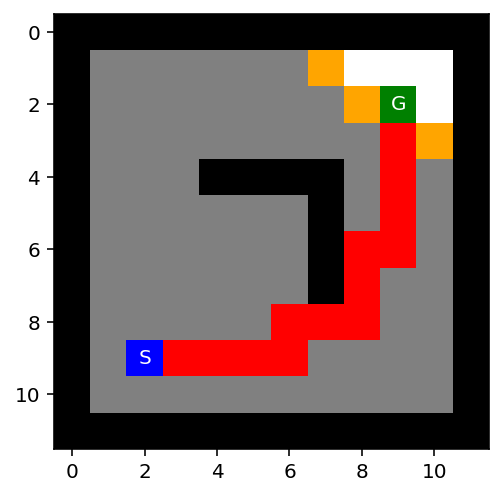

Sequence (len: 14 ): ['E', 'E', 'E', 'E', 'N', 'E', 'E', 'N', 'N', 'E', 'N', 'N', 'N', 'N']
Nodes Expanded: 85
CPU times: user 6.44 s, sys: 0 ns, total: 6.44 s
Wall time: 6.44 s


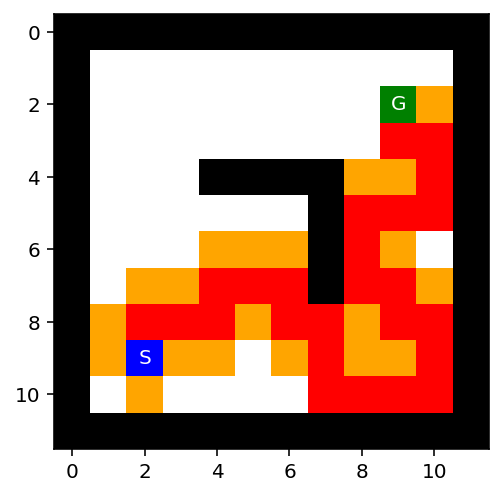

Sequence (len: 26 ): ['N', 'E', 'E', 'N', 'E', 'E', 'S', 'E', 'S', 'S', 'E', 'E', 'E', 'N', 'N', 'W', 'N', 'W', 'N', 'N', 'E', 'E', 'N', 'N', 'W', 'N']
Nodes Expanded: 75608


In [7]:
%run maze_helper.py
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from numpy import random
import time

#function that finds all of the empty spaces next to a given node
def frontier_dirs(maze, node):
    dirs = [ ]
    # We don't want to add a node that is outside of the map
    if(node.pos[0] != 0):
        # Check to see if the node to the north is blank, add to possible frontier if so
        if(maze[node.pos[0]-1, node.pos[1]] == ' ' or maze[node.pos[0]-1, node.pos[1]] == 'G'):
            dirs.append((node.pos[0]-1, node.pos[1], "N"))
    if(node.pos[0] != len(maze[0])-1):
        # Check to see if the node to the south is blank, add to possible frontier if so
        if(maze[node.pos[0]+1, node.pos[1]] == ' ' or maze[node.pos[0]+1, node.pos[1]] == 'G'):
            dirs.append((node.pos[0]+1, node.pos[1], "S"))
    if(node.pos[1] != 0):
        # Check to see if the node to the west is blank, add to possible frontier if so
        if(maze[node.pos[0], node.pos[1]-1] == ' ' or maze[node.pos[0], node.pos[1]-1] == 'G'):
            dirs.append((node.pos[0], node.pos[1]-1, "W"))
    if(node.pos[1] != len(maze[0][0])-1):
        # Check to see if the node to the east is blank, add to possible frontier if so
        if(maze[node.pos[0], node.pos[1]+1] == ' ' or maze[node.pos[0], node.pos[1]+1] == 'G'):
            dirs.append((node.pos[0], node.pos[1]+1, "E"))
    return dirs

#Function that adds the explored zone, frontier, and positon/path tiles for printing
def update_maze(maze, curr_node, frontier = [], reached = []) :
    #reached is period
    for x in reached :
        if maze[x] != "S":
            maze[x[0],x[1]] = "."
    # frontier is F
    for y in frontier :
        if maze[y.pos] != "S" and maze[y.pos] != "G" :
            maze[y.pos[0],y.pos[1]] = "F"
    # path/position is P
    while maze[curr_node.pos[0],curr_node.pos[1]] != "S" :
        maze[curr_node.pos[0],curr_node.pos[1]] = "P"
        curr_node = curr_node.parent
    return maze

# Breadth-first Search
def breadth_first_search(maze, visual = False):
    #metrics are [nodes expanded ,max tree depth, max tree size, max frontier size]
    metrics = [0,0,0,0]
    root = Node(pos = find_pos(maze, what = "S"), parent = None, action = None, cost = 0)
    solved = False
    sequence = []
    # Should be impossible, but if the root node is the goal node, we return the maze as is
    if look(maze, root.pos) == "G" : return [maze, sequence, metrics]
    #root is added to frontier and reached data structures
    frontier = [root]
    reached = { root.pos: repr(root) }
    while len(frontier) != 0 and solved == False:
        # add the max frontier to the metrics if applicable
        if len(frontier) > metrics[3] : metrics[3] = len(frontier)
        # retrieving the next node from the LIFO queue
        curr_node = frontier.pop(0)
        # increment the nodes expanded
        metrics[0] = metrics[0] + 1
        # increment the max depth if applicable
        if curr_node.cost > metrics[1] : metrics[1] = curr_node.cost
        # get all of the empty neighbors and iterate until solution is found or no more neighbors
        empty_dirs = frontier_dirs(maze, curr_node)
        while len(empty_dirs) != 0 or solved :
            # choose an empty neighbor randomly
            rand_dir = random.randint(len(empty_dirs))
            child_node = Node(pos = (empty_dirs[rand_dir][0], empty_dirs[rand_dir][1]), parent = curr_node, action = empty_dirs[rand_dir][2], cost = curr_node.cost + 1)
            empty_dirs.pop(rand_dir)
            # If goal is found, break
            if look(maze, child_node.pos) == 'G':
                goal_node = child_node
                solved = True
                break
            # add child to frontier if not already visited
            if child_node.pos not in reached:
                reached[child_node.pos] = repr(child_node)
                curr_tree_size = len(reached) + len(frontier)
                # increment max tree size if applicable
                if curr_tree_size > metrics[2] : metrics[2] = curr_tree_size
                frontier.append(child_node)
        if visual :
            show_maze(update_maze(maze, curr_node, frontier, reached))
    # If no solution is possible, just return maze and metrics with empty sequence
    if solved == False or goal_node == None : return [ maze, sequence, metrics ]
    # Otherwise update the maze and generate sequence
    maze = update_maze(maze, goal_node.parent, frontier, reached)
    while goal_node.pos != root.pos:
        sequence.insert(0, goal_node.action)
        goal_node = goal_node.parent
    return [maze, sequence, metrics]

# Cycle checking function for DFS
def is_cycle(node) :
    node_pos = node.pos
    while node.parent != None :
        node = node.parent
        if node.pos == node_pos : return True
    return False
    
# Depth-first Search
def depth_first_search(maze, visual = False):
    #copy maze for show_maze()
    orig_maze = maze.copy()
    root = Node(pos = find_pos(maze, what = "S"), parent = None, action = None, cost = 0)
    sequence = []
    #metrics are [nodes expanded ,max tree depth, max tree size, max frontier size]
    metrics = [0,0,0,0]
    frontier = [root]
    # search until there is nothing left in the frontier
    while len(frontier) != 0 :
        # add the max frontier to the metrics if applicable
        if len(frontier) > metrics[3] : metrics[3] = len(frontier)
        # retrieving the next node from the FIFO stack
        curr_node = frontier.pop()
        # break if we found the goal
        if maze[curr_node.pos[0], curr_node.pos[1]] == 'G': break
        # Only consider adding if not currently in path
        if not is_cycle(curr_node) :
            curr_tree_size = curr_node.cost + len(frontier)
            # increment the max tree size if applicable
            if curr_tree_size > metrics[2] : metrics[2] = curr_tree_size
            # increment the nodes expanded
            metrics[0] = metrics[0] + 1
            # increment the max depth if applicable
            if curr_node.cost > metrics[1] : metrics[1] = curr_node.cost
            empty_dirs = frontier_dirs(maze, curr_node)
            # get all of the empty neighbors and iterate until solution is found or no more neighbors
            while len(empty_dirs) != 0 :
                # choose an empty neighbor randomly
                rand_dir = random.randint(len(empty_dirs))
                # Only add to frontier if not currently in frontier
                in_frontier = False
                for x in frontier : 
                    if x.pos == (empty_dirs[rand_dir][0],empty_dirs[rand_dir][1]): 
                        in_frontier = True
                # Also don't add if it is is the parent node, since this is done before cycle check
                if curr_node.pos != (empty_dirs[rand_dir][0],empty_dirs[rand_dir][1]) and not in_frontier: 
                    child_node = Node(pos = (empty_dirs[rand_dir][0], empty_dirs[rand_dir][1]), parent = curr_node, action = empty_dirs[rand_dir][2], cost = curr_node.cost + 1)
                    empty_dirs.pop(rand_dir)
                    if not is_cycle(child_node) : frontier.append(child_node)
                # otherwise remove from consideration
                else : 
                    empty_dirs.pop(rand_dir)
                if visual :
                    show_maze(update_maze(maze, curr_node, frontier))
                    maze = orig_maze.copy()
    # Update the colors on the maze and generated solution sequence
    maze = update_maze(orig_maze, curr_node.parent, frontier)
    while curr_node.pos != root.pos:
        sequence.insert(0, curr_node.action)
        curr_node = curr_node.parent
    return [maze, sequence, metrics]

#load the maze of your choice
#f = open("empty_2_maze.txt", "r")
#f = open("empty_maze.txt", "r")
#f = open("large_maze.txt", "r")
#f = open("loops_maze.txt", "r")
#f = open("medium_maze.txt", "r")
#f = open("open_maze.txt", "r")
#f = open("small_maze.txt", "r")
f = open("wall_maze.txt", "r")

#read the file to store a maze string
maze_str = f.read()

#parse the maze string
maze = parse_maze(maze_str)
empty = 0

# Calculating all of the white spaces on map prior to solving
for x in range(len(maze)):
    for y in range(len(maze[x])):
        if(maze[x][y] == ' ' or maze[x][y] == 'P'): empty = empty + 1
print("Total Empty Space in Maze:", empty)

#run the breadth_first_search algorithm on the maze and print
%time results = breadth_first_search(maze, visual = False)
maze = results[0]
show_maze(maze)
print("Sequence (len:", len(results[1]), "):", results[1])
print("Nodes Expanded:", results[2][0])

#parse the maze string
maze = parse_maze(maze_str)

#run the depth_first_search algorithm on the maze and print
%time results = depth_first_search(maze, visual = False)
maze = results[0]
show_maze(maze)
print("Sequence (len:", len(results[1]), "):", results[1])
print("Nodes Expanded:", results[2][0])



#### How does BFS and DFS deal with loops (cycles)?

For Depth-first search, we have a cycle checking function to see if the potential node is already in our current navigation
For Breadth-first search, all of the nodes that we have reached are stored in memory, so we just check if the potential node has already been reached.

#### Are your implementations complete and optimal? Explain why. What is the time and space complexity of each of **your** implementations? 
Breadth-first serach is Complete and optimal, since all step costs are equal. The time complexity is O(b^d), and the space complexity is O(b^d)
Depth-first search is Complete in finite spaces, but is not optimal. The time complexity is (b^m), and the Space complexity is O(bm), where b is the maximum branching factor of the search tree, d is the depth of the optimal solution, and m is the maximum length of any path in the state space.

## Task 3: Implement greedy best-first search and A* search  [4 points]

You can use the map to estimate the distance from your current position to the goal using the Manhattan distance (see https://en.wikipedia.org/wiki/Taxicab_geometry) as a heuristic function. Both algorithms are based on Best-First search which requires only a small change from the BFS algorithm you have already implemented (see textbook/slides). 

Total Empty Space in Maze: 682
CPU times: user 15.4 ms, sys: 0 ns, total: 15.4 ms
Wall time: 13.9 ms


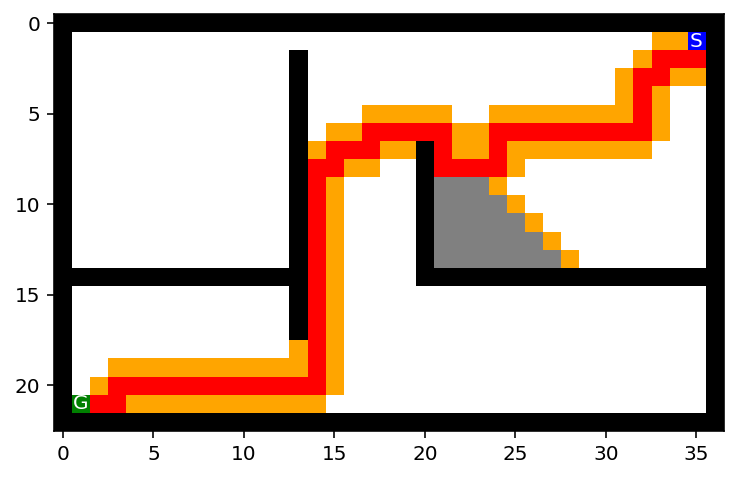

Sequence (len: 58 ): ['S', 'W', 'W', 'S', 'W', 'S', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'S', 'W', 'W', 'W', 'N', 'N', 'W', 'W', 'W', 'W', 'S', 'W', 'W', 'S', 'W', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'W', 'W']
Nodes Expanded: 99
CPU times: user 23.2 ms, sys: 91 µs, total: 23.3 ms
Wall time: 20 ms


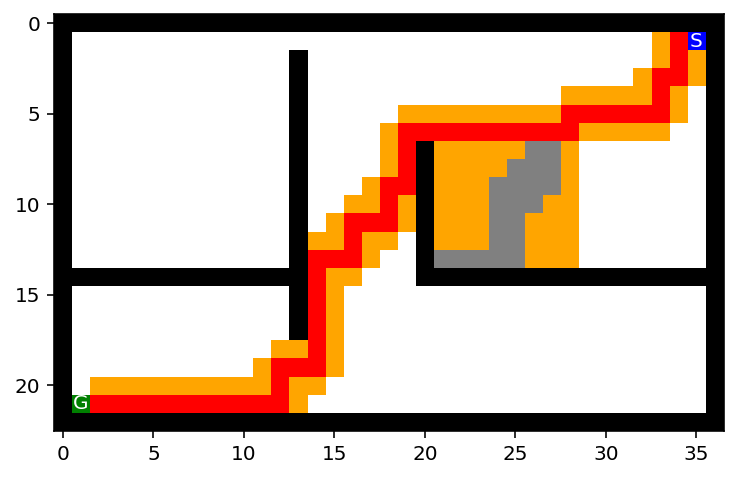

Sequence (len: 54 ): ['W', 'S', 'S', 'W', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'S', 'S', 'W', 'S', 'S', 'W', 'W', 'S', 'S', 'W', 'W', 'S', 'S', 'S', 'S', 'S', 'S', 'W', 'W', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W']
Nodes Expanded: 103


In [8]:
# Find the best node to move to next
def find_best(maze, frontier) :
    best_index = 0
    best_man = 1000000
    goal_pos = find_pos(maze, "G")
    #find the node in the frontier that has the lowest manhattan distance
    for x in range(len(frontier)) :
        man_dist = abs(frontier[x].pos[0] - goal_pos[0]) + abs(frontier[x].pos[1] - goal_pos[1])
        #If there are more than one, we choose the one that was added to the frontier last
        if man_dist <= best_man : 
            best_man = man_dist
            best_index = x
    return best_index

# need different function since heuristic has changed
def find_best_astar(maze, frontier) :
    best_index = 0
    best_f = 1000000
    goal_pos = find_pos(maze, "G")
    #find the node in the frontier that has the lowest manhattan distance plus cost to node
    for x in range(len(frontier)) :
        man_dist = abs(frontier[x].pos[0] - goal_pos[0]) + abs(frontier[x].pos[1] - goal_pos[1])
        g_val = frontier[x].cost
        f_val = man_dist + g_val
        #If there are more than one, we choose the one that was added to the frontier last
        if f_val <= best_f : 
            best_f = f_val
            best_index = x
    return best_index

#need different update function since reached data structure has changed
def update_maze_best(maze, curr_node, frontier = [], reached = []) :
    #reached is period
    for x in reached :
        if maze[x[0]] != "S":
            maze[x[0][0],x[0][1]] = "."
    # frontier is F
    for y in frontier :
        if maze[y.pos] != "S" and maze[y.pos] != "G" :
            maze[y.pos[0],y.pos[1]] = "F"
    #path/position is P
    while maze[curr_node.pos[0],curr_node.pos[1]] != "S" :
        maze[curr_node.pos[0],curr_node.pos[1]] = "P"
        curr_node = curr_node.parent
    return maze

# Greedy Best-first Search
def greedy_best_first_search(maze, visual = False):
    #metrics are [nodes expanded ,max tree depth, max tree size, max frontier size]
    metrics = [0,0,0,0]
    root = Node(pos = find_pos(maze, what = "S"), parent = None, action = None, cost = 0)
    solved = False
    sequence = []
    # Should be impossible, but if the root node is the goal node, we return the maze as is
    if look(maze, root.pos) == "G" : return [maze, sequence, metrics]
    #root is added to frontier and reached data structures
    frontier = [root]
    reached = { root.pos: [repr(root),root.cost] }
    # Go until frontier is empty or maze is solved
    while len(frontier) != 0 and solved == False:
        # add the max frontier to the metrics if applicable
        if len(frontier) > metrics[3] : metrics[3] = len(frontier)
        #find the index of the node with the best heuristic
        best_index = find_best(maze, frontier)
        curr_node = frontier.pop(best_index)
        # increment the nodes expanded
        metrics[0] = metrics[0] + 1
        # increment the max depth if applicable
        if curr_node.cost > metrics[1] : metrics[1] = curr_node.cost
        # Consider adding the empty nodes surrounding to the frontier
        empty_dirs = frontier_dirs(maze, curr_node)
        while len(empty_dirs) != 0 or solved :
            # choose the node to consider randomly
            rand_dir = random.randint(len(empty_dirs))
            child_node = Node(pos = (empty_dirs[rand_dir][0], empty_dirs[rand_dir][1]), parent = curr_node, action = empty_dirs[rand_dir][2], cost = curr_node.cost + 1)
            empty_dirs.pop(rand_dir)
            # If goal found, break
            if look(maze, child_node.pos) == 'G':
                goal_node = child_node
                solved = True
                break
            # Only add node if not in reached
            if child_node.pos not in reached :
                reached[child_node.pos] = [repr(child_node),child_node.cost]
                curr_tree_size = len(reached) + len(frontier)
                # increment the max tree if applicable
                if curr_tree_size > metrics[2] : metrics[2] = curr_tree_size
                frontier.append(child_node)
            # or reconsider nodes, even if they have been reached, but only if their cost is better.
            elif child_node.cost < reached[child_node.pos][1] :
                reached[child_node.pos] = [repr(child_node),child_node.cost]
                curr_tree_size = len(reached) + len(frontier)
                # increment the max tree if applicable
                if curr_tree_size > metrics[2] : metrics[2] = curr_tree_size
                frontier.append(child_node)
        if visual :
            show_maze(update_maze(maze, curr_node, frontier, reached))
    #If no solution found, return maze and metrics with empty sequence
    if solved == False or goal_node == None : 
        return [ maze, sequence, metrics ]
    #update maze and create sequence
    maze = update_maze(maze, goal_node.parent, frontier, reached)
    while goal_node.pos != root.pos:
        sequence.insert(0, goal_node.action)
        goal_node = goal_node.parent
    return [maze, sequence, metrics]

# A* Search:
def a_star_search(maze, visual = False):
    #metrics are [nodes expanded ,max tree depth, max tree size, max frontier size]
    metrics = [0,0,0,0]
    root = Node(pos = find_pos(maze, what = "S"), parent = None, action = None, cost = 0)
    solved = False
    sequence = []
    # Should be impossible, but if the root node is the goal node, we return the maze as is
    if look(maze, root.pos) == "G" : return [maze, sequence, metrics]
    #root is added to frontier and reached data structures
    frontier = [root]
    reached = { root.pos: [repr(root),root.cost] }
    # Go until frontier is empty or maze is solved
    while len(frontier) != 0 and solved == False:
        # add the max frontier to the metrics if applicable
        if len(frontier) > metrics[3] : metrics[3] = len(frontier)
        #find the index of the node with the best heuristic
        best_index = find_best_astar(maze, frontier)
        curr_node = frontier.pop(best_index)
        # increment the nodes expanded
        metrics[0] = metrics[0] + 1
        # increment the max depth if applicable
        if curr_node.cost > metrics[1] : metrics[1] = curr_node.cost
        # Consider adding the empty nodes surrounding to the frontier
        empty_dirs = frontier_dirs(maze, curr_node)
        while len(empty_dirs) != 0 or solved :
            # choose the node to consider randomly
            rand_dir = random.randint(len(empty_dirs))
            child_node = Node(pos = (empty_dirs[rand_dir][0], empty_dirs[rand_dir][1]), parent = curr_node, action = empty_dirs[rand_dir][2], cost = curr_node.cost + 1)
            empty_dirs.pop(rand_dir)
            # If goal found, break
            if look(maze, child_node.pos) == 'G':
                goal_node = child_node
                solved = True
                break
            if child_node.pos not in reached :
                reached[child_node.pos] = [repr(child_node),child_node.cost]
                curr_tree_size = len(reached) + len(frontier)
                # increment the max tree if applicable
                if curr_tree_size > metrics[2] : metrics[2] = curr_tree_size
                frontier.append(child_node)
            # or reconsider nodes, even if they have been reached, but only if their cost is better.
            elif child_node.cost < reached[child_node.pos][1] :
                reached[child_node.pos] = [repr(child_node),child_node.cost]
                curr_tree_size = len(reached) + len(frontier)
                # increment the max tree if applicable
                if curr_tree_size > metrics[2] : metrics[2] = curr_tree_size
                frontier.append(child_node)
        if visual :
            show_maze(update_maze(maze, curr_node, frontier, reached))
    #If no solution found, return maze and metrics with empty sequence
    if solved == False or goal_node == None : return [ maze, sequence, metrics ]
    #update maze and create sequence
    maze = update_maze(maze, goal_node.parent, frontier, reached)
    while goal_node.pos != root.pos:
        sequence.insert(0, goal_node.action)
        goal_node = goal_node.parent
    return [maze, sequence, metrics]

#load the maze of your choice
#f = open("empty_2_maze.txt", "r")
#f = open("empty_maze.txt", "r")
#f = open("large_maze.txt", "r")
#f = open("loops_maze.txt", "r")
#f = open("medium_maze.txt", "r")
f = open("open_maze.txt", "r")
#f = open("small_maze.txt", "r")
#f = open("wall_maze.txt", "r")

#read the file to store a maze string
maze_str = f.read()

#parse the maze string
maze = parse_maze(maze_str)
empty = 0

# Calculating all of the white spaces on map prior to solving
for x in range(len(maze)):
    for y in range(len(maze[x])):
        if(maze[x][y] == ' ' or maze[x][y] == 'P'): empty = empty + 1
print("Total Empty Space in Maze:", empty)

#parse the maze string
maze = parse_maze(maze_str)

#run the greedy_best_first_search algorithm on the maze and print
%time results = greedy_best_first_search(maze, visual = False)
maze = results[0]
show_maze(maze)
print("Sequence (len:", len(results[1]), "):", results[1])
print("Nodes Expanded:", results[2][0])

#parse the maze string
maze = parse_maze(maze_str)

#run the a_star_search algorithm on the maze and print
%time results = a_star_search(maze, visual = False)
maze = results[0]
show_maze(maze)
print("Sequence (len:", len(results[1]), "):", results[1])
print("Nodes Expanded:", results[2][0])

#### Are your implementations complete and optimal? What is the time and space complexity?  
  
The greedy best-first search and the A* search algorithms both are complete, as they will always find a goal if path to a goal exists. The greedy best-first search is only optimal in finite spaces. The gredy best-first search will add nodes to the frontier that are further from the goal only if there are no other potential nodes that are closer. It selects the node from the frontier that is closest to the goal, without consideration for how many steps it took to reach the node in the frontier. This causes the greedy best-first search to be sub-optimal when a shorter route exists. The A* search takes into account the cost that it took for the cell in the frontier to be reached. Thus, the A* search is optimal. It will pass up nodes in the frontier that are closer to the goal but cost more to arrive at.

The time and space complexity for both algorithms is shorter than the depth-first search. The manhattan distance is an inexpensive heuristic to choose, but for mazes that are more open or have more branching routes, the heuristic calculation for every node in the frontier can take a lot longer. The time space complexity of the greedy-best first search depends on the maze and if the path to the goal requires moving away from the goal. The best case space complexity would take O(bd), while the worst case would take O(b^m), where b is the maximum branching factor, d is the depth of the optimal solution, and m is the maximum length of a path in the tree. The time and space complexity of the A* search is the same, and it depends on the number of nodes who have an g(n) and h(n) that are less than the cost of the optimal solution.

## Task 4: Comparison and discussion [2 points] 

Run experiments to compare the implemented algorithms and present the results as tables and charts. 

How to deal with issues:

* Your implementation returns unexpected results: Try to debug and fix the code. Visualizing the maze, the current path and the frontier after every step is very helpful. If the code still does not work, then mark the result with an asterisk (*) and describe the issue below the table.

* Your implementation cannot consistently solve a specific maze and ends up in an infinite loop:
    Debug. If it is a shortcoming of the algorithm/implementation, then put "N/A*" in the results table and describe why this is happening.

In [9]:
#load the maze of your choice
#f = open("empty_2_maze.txt", "r")
#f = open("empty_maze.txt", "r")
#f = open("large_maze.txt", "r")
#f = open("loops_maze.txt", "r")
#f = open("medium_maze.txt", "r")
#f = open("open_maze.txt", "r")
#f = open("small_maze.txt", "r")
f = open("wall_maze.txt", "r")

#read the file to store a maze string
maze_str = f.read()
lowest_results = [100000,100000,100000,100000,100000]
highest_results = [0,0,0,0,0]

for x in range(1000):
    #parse the maze string
    maze = parse_maze(maze_str)
    #run the algorithm of your choice on the maze
    #results = breadth_first_search(maze, visual = False)
    #results = depth_first_search(maze, visual = False)
    #results = greedy_best_first_search(maze, visual = False)
    results = a_star_search(maze, visual = False)
    maze = results[0]
    #Find the highest and lowest values
    if len(results[1]) < lowest_results[0] : lowest_results[0] = len(results[1])
    if results[2][0] < lowest_results[1] : lowest_results[1] = results[2][0]
    if results[2][1] < lowest_results[2] : lowest_results[2] = results[2][1]
    if results[2][2] < lowest_results[3] : lowest_results[3] = results[2][2]
    if results[2][3] < lowest_results[4] : lowest_results[4] = results[2][3]
    if len(results[1]) > highest_results[0] : highest_results[0] = len(results[1])
    if results[2][0] > highest_results[1] : highest_results[1] = results[2][0]
    if results[2][1] > highest_results[2] : highest_results[2] = results[2][1]
    if results[2][2] > highest_results[3] : highest_results[3] = results[2][2]
    if results[2][3] > highest_results[4] : highest_results[4] = results[2][3]

print("Sequence Length (L/H):", lowest_results[0], "/", highest_results[0])
print("Nodes Expanded (L/H):", lowest_results[1], "/", highest_results[1])
print("Max Tree Depth (L/H):", lowest_results[2], "/", highest_results[2])
print("Max Tree Size (L/H):", lowest_results[3], "/", highest_results[3])
print("Max Frontier Size (L/H):", lowest_results[4], "/", highest_results[4])


Sequence Length (L/H): 14 / 14
Nodes Expanded (L/H): 14 / 23
Max Tree Depth (L/H): 13 / 13
Max Tree Size (L/H): 52 / 75
Max Frontier Size (L/H): 20 / 27


### The following table contains the metircs for each maze:
Each maze is run 1000 times. The best value is followed by the worst value for each column out of all of the runs.

__Small maze__

| algorithm | path cost | nodes expanded | max tree depth | max tree size | max frontier size |
|-----------|-----------|----------------|----------------|---------------|-------------------|
| BFS       | 19 / 19   |    89 / 91     |    18 / 18     |   93 / 94     |      8 / 9        |
| DFS       | 19 / 49   |   19 / 91      |    18 / 48     |  25 / 86      |  4 / 9            |
| GBS       | 29 / 29   |   39 / 39      |    47 / 47     |  5 / 5        |  5 / 5            |
| A*        | 19 / 19   |   35 / 51      |    18 / 18     |  49 / 63      |  7 / 8            |

__Medium Maze__

| algorithm | path cost | nodes expanded | max tree depth | max tree size | max frontier size |
|-----------|-----------|----------------|----------------|---------------|-------------------|
| BFS       | 68 / 68   |    265 / 268   |    67 / 67     |   271 / 273   |      8 / 9        |
| DFS       |   N/A     |      N/A       |      N/A       |    N/A        |     N/A           |
| GBS       | 74 / 152  |    78 / 159    |    73 / 151    |    84 / 173   |     4 / 8         |
| A*        |   68 / 68 |     216 / 221  |    67 / 67     |   228 / 233   |     8 / 8         |

__Large Maze__

| algorithm | path cost | nodes expanded | max tree depth | max tree size | max frontier size |
|-----------|-----------|----------------|----------------|---------------|-------------------|
| BFS       | 210 / 210 |    616 / 619   |   209 / 209    |    622 / 625  |     8 / 9         |
| DFS       | 210 / 210 |    288 / 558   |   209 / 222    |    234 / 269  |     24 / 50       |
| GBS       | 210 / 210 |    440 / 486   |   209 / 209    |    491 / 518  |     17 / 28       |
| A*        | 210 / 210 |    540 / 549   |   209 / 209    |    560 / 563  |     12 / 12       |

__Empty maze__

| algorithm | path cost | nodes expanded | max tree depth | max tree size | max frontier size |
|-----------|-----------|----------------|----------------|---------------|-------------------|
| BFS       |   14 / 14 |  91 / 92       |   13 / 13      |   98 / 99     |   11 / 12         |
| DFS       |   N/A     |  N/A           |    N/A         |    N/A        |   N/A             |
| GBS       |   14 / 14 |  14 / 14       |   13 / 13      |   48 / 69     |    18 / 27        |
| A*        |   14 / 14 |  14 / 14       |   13 / 13      |   48 / 69     |    18 / 27        |

__Loop Maze__

| algorithm | path cost | nodes expanded | max tree depth | max tree size | max frontier size |
|-----------|-----------|----------------|----------------|---------------|-------------------|
| BFS       | 23 / 23   |    70 / 70     |   22 / 22      |   72 / 73     |     7 / 8         |
| DFS       |   N/A     |  N/A           |    N/A         |    N/A        |   N/A             |
| GBS       | 23 / 23   |    70 / 86     |   22 / 22      |   65 / 69     |     9 / 11        |
| A*        | 23 / 23   |    57 / 60     |   22 / 22      |   65 / 69     |     9 / 11        |

__Open Maze__

| algorithm | path cost | nodes expanded | max tree depth | max tree size | max frontier size |
|-----------|-----------|----------------|----------------|---------------|-------------------|
| BFS       |  54 / 54  |    679 / 681   |   53 / 53      |   687 / 688   |     24 / 25       |
| DFS       |   N/A     |  N/A           |    N/A         |    N/A        |   N/A             |
| GBS       |  54 / 68  |    54 / 126    |   53 / 67      |   178 / 260   |   63 / 91         |
| A*        |  54 / 54  |    54 / 159    |   53 / 53      |   169 / 378   |   58 / 155        |

__Wall Maze__

| algorithm | path cost | nodes expanded | max tree depth | max tree size | max frontier size |
|-----------|-----------|----------------|----------------|---------------|-------------------|
| BFS       |  14 / 14  |   84 / 85      |   13 / 13      |   91 / 91     |    9 / 11         |
| DFS       |   N/A     |  N/A           |    N/A         |    N/A        |   N/A             |
| GBS       |  14 / 18  |   14 / 23      |   13 / 17      |   52 / 78     |    19 / 29        |
| A*        |  14 / 14  |   14 / 23      |   13 / 13      |   52 / 75     |    20 / 27        |

#### Discuss the most important lessons you have learned from implementing the different search strategies. 
 - The depth-first search algorithm may get trapped if there is no path to a solution in a branch that contains multiple looks loops. This is why several of the tables above have "N/A" for the DFS row. If the depth-first search algorithm chooses to travel down a node that does not contain the a goal node, and that node's branch has multiple loops within it, the algorithm will continuously choose these loops to navigate down. This is because the depth-first search algorithm does not store in memory the nodes  that it has explored previously. For this reason, the depth-first search is not recommended for problems that contain loops that will not eventually lead to the goal state. Here is an example of each maze type and a search path that results in an endless loop:
#### Medium Maze:
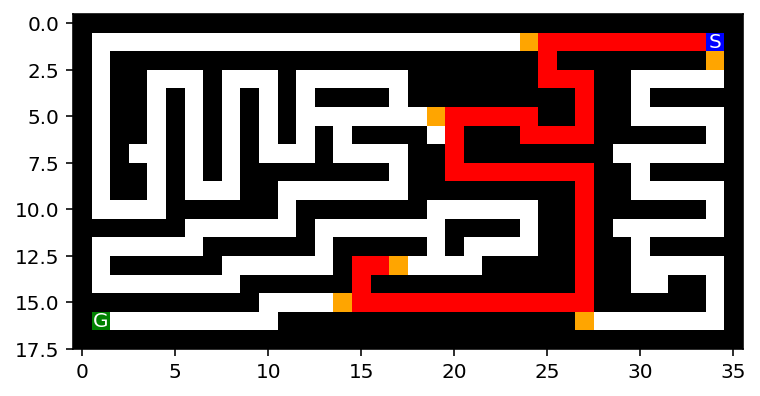
#### Empty Maze:
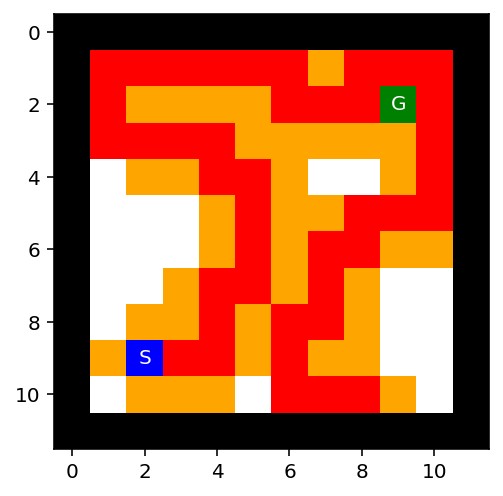
#### Loop Maze:
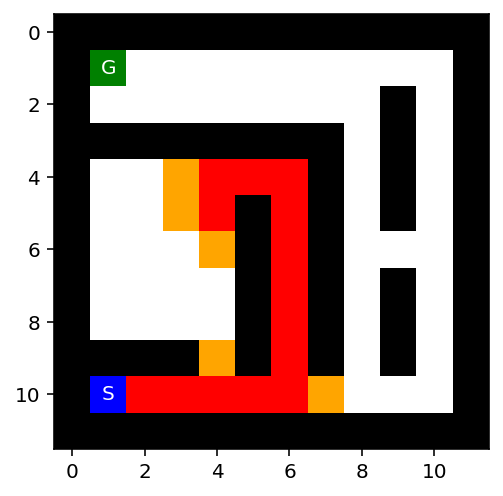
#### Open Maze:
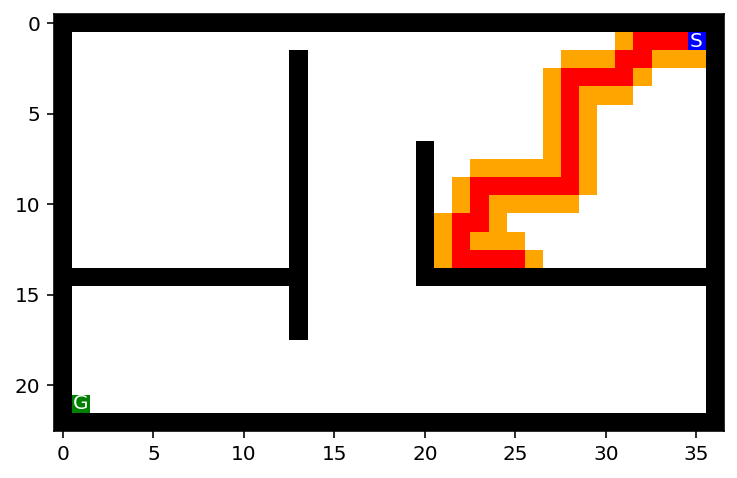
#### Wall Maze:
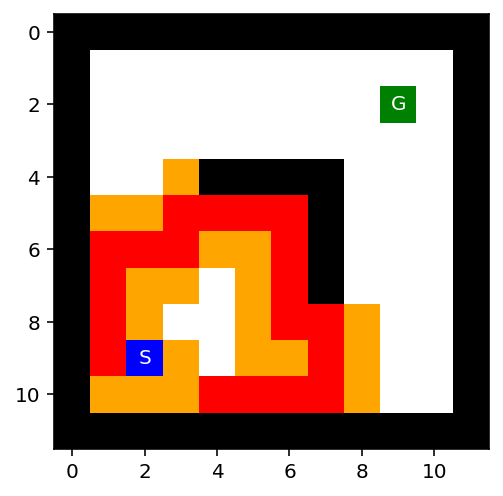
 - If the A* heuristic finds multiple nodes in the frontier that are tied for the minimum value, it should choose the node that was added most recently to the frontier. This is done to prevent the search algorithm from spreading out from previous nodes before fully exploring the recently-added nodes. If the oldest node is checked first, there are a lot more nodes explored through the course of the search. Also, in an open environment the search will look more like breadth-first search at first, which removes a lot of the performance benefits of breadth-first search. Here is an example:
 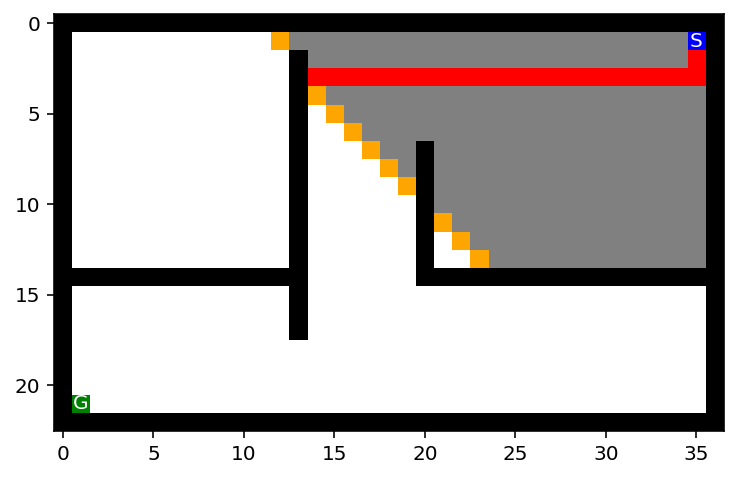  
  The eventual solution maze looks like this:
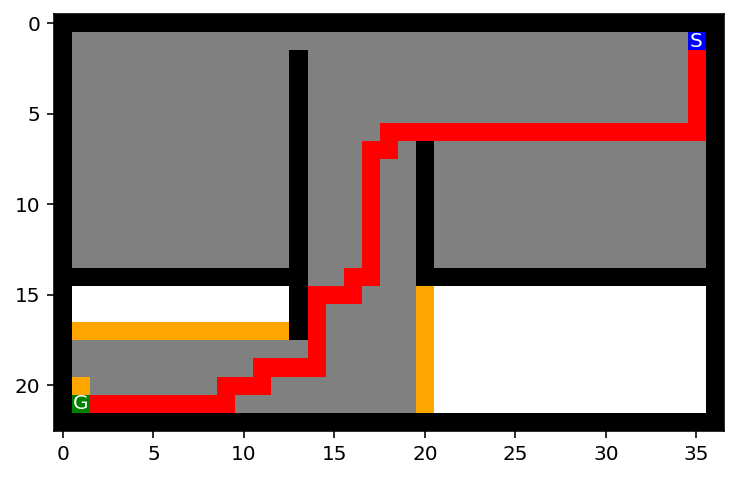  
  While this maze is completed with less nodes explored than breadth-first search, the complexity is much better if the heuristic chooses the last added node that has the minimum value. See an example here:
  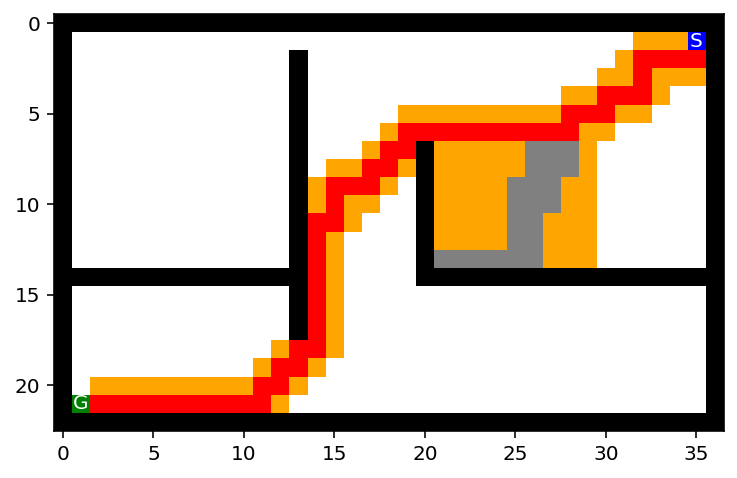

## Graduate student advanced task: Multiple Goals [1 point]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+1 Bonus point].

Create a few mazes with multiple goals by adding one or two more goals to the medium size maze.
Solve the maze with your implementations for DFS, BFS, and implement IDS (iterative deepening search using DFS). Run experiments to show which implementations find the optimal solution.

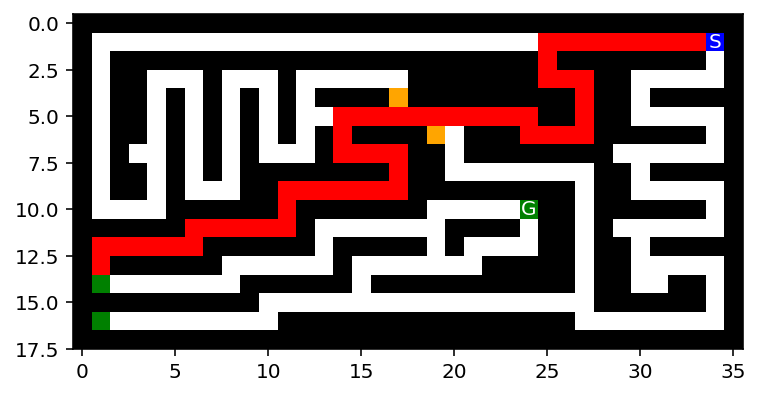

Breadth first search:
Sequence Length (L/H): 58 / 58
Nodes Expanded (L/H): 223 / 225
Max Tree Depth (L/H): 57 / 57
Max Tree Size (L/H): 227 / 229
Max Frontier Size (L/H): 8 / 9
Depth first search:
Sequence Length (L/H): 58 / 188
Nodes Expanded (L/H): 59 / 229
Max Tree Depth (L/H): 57 / 187
Max Tree Size (L/H): 62 / 196
Max Frontier Size (L/H): 5 / 12
Iterative Deepening Depth First Search:
Sequence Length (L/H): 58 / 58
Nodes Expanded (L/H): 7483 / 8299
Max Tree Depth (L/H): 57 / 57
Max Tree Size (L/H): 61 / 64
Max Frontier Size (L/H): 7 / 8


In [10]:
# Depth-first Search
def depth_first_search(maze, visual = False):
    #copy maze for show_maze()
    orig_maze = maze.copy()
    root = Node(pos = find_pos(maze, what = "S"), parent = None, action = None, cost = 0)
    sequence = []
    #metrics are [nodes expanded ,max tree depth, max tree size, max frontier size]
    metrics = [0,0,0,0]
    frontier = [root]
    # search until there is nothing left in the frontier
    while len(frontier) != 0 :
        # add the max frontier to the metrics if applicable
        if len(frontier) > metrics[3] : metrics[3] = len(frontier)
        # retrieving the next node from the FIFO stack
        curr_node = frontier.pop()
        # break if we found the goal
        if maze[curr_node.pos[0], curr_node.pos[1]] == 'G': break
        # Only consider adding if not currently in path
        if not is_cycle(curr_node) :
            curr_tree_size = curr_node.cost + len(frontier)
            # increment the max tree size if applicable
            if curr_tree_size > metrics[2] : metrics[2] = curr_tree_size
            # increment the nodes expanded
            metrics[0] = metrics[0] + 1
            # increment the max depth if applicable
            if curr_node.cost > metrics[1] : metrics[1] = curr_node.cost
            empty_dirs = frontier_dirs(maze, curr_node)
            # get all of the empty neighbors and iterate until solution is found or no more neighbors
            while len(empty_dirs) != 0 :
                # choose an empty neighbor randomly
                rand_dir = random.randint(len(empty_dirs))
                # Only add to frontier if not currently in frontier
                in_frontier = False
                for x in frontier : 
                    if x.pos == (empty_dirs[rand_dir][0],empty_dirs[rand_dir][1]): 
                        in_frontier = True
                # Also don't add if it is is the parent node, since this is done before cycle check
                if curr_node.pos != (empty_dirs[rand_dir][0],empty_dirs[rand_dir][1]) and not in_frontier: 
                    child_node = Node(pos = (empty_dirs[rand_dir][0], empty_dirs[rand_dir][1]), parent = curr_node, action = empty_dirs[rand_dir][2], cost = curr_node.cost + 1)
                    empty_dirs.pop(rand_dir)
                    if not is_cycle(child_node) : frontier.append(child_node)
                # otherwise remove from consideration
                else : 
                    empty_dirs.pop(rand_dir)
                if visual :
                    show_maze(update_maze(maze, curr_node, frontier))
                    maze = orig_maze.copy()
    # Update the colors on the maze and generated solution sequence
    maze = update_maze(orig_maze, curr_node.parent, frontier)
    while curr_node.pos != root.pos:
        sequence.insert(0, curr_node.action)
        curr_node = curr_node.parent
    return [maze, sequence, metrics]




# Depth-limited Search for IDS:
def depth_limited_search(maze, limit, visual = False):
    #copy maze for show_maze()
    orig_maze = maze.copy()
    root = Node(pos = find_pos(maze, what = "S"), parent = None, action = None, cost = 0)
    sequence = []
    #metrics are [nodes expanded ,max tree depth, max tree size, max frontier size]
    metrics = [0,0,0,0]
    frontier = [root]
    cutoff = False
    solved = False
    # search until there is nothing left in the frontier
    while len(frontier) != 0 :
        # add the max frontier to the metrics if applicable
        if len(frontier) > metrics[3] : metrics[3] = len(frontier)
        curr_node = frontier.pop()
        # break if we found the goal
        if maze[curr_node.pos[0], curr_node.pos[1]] == 'G': 
            solved = True
            break
        # Decide to cut off search if depth limit is reached
        if curr_node.cost > limit : cutoff = True
        # Only consider adding if not currently in path
        elif not is_cycle(curr_node) :
            curr_tree_size = curr_node.cost + len(frontier)
            # increment the max tree size if applicable
            if curr_tree_size > metrics[2] : metrics[2] = curr_tree_size
            # increment the nodes expanded
            metrics[0] = metrics[0] + 1
            # increment the max depth if applicable
            if curr_node.cost > metrics[1] : metrics[1] = curr_node.cost
            empty_dirs = frontier_dirs(maze, curr_node)
            # get all of the empty neighbors and iterate until solution is found or no more neighbors
            while len(empty_dirs) != 0 :
                # choose an empty neighbor randomly
                rand_dir = random.randint(len(empty_dirs))
                # Only add to frontier if not currently in frontier
                in_frontier = False
                for x in frontier : 
                    if x.pos == (empty_dirs[rand_dir][0],empty_dirs[rand_dir][1]): 
                        in_frontier = True
                # Also don't add if it is is the parent node, since this is done before cycle check
                if curr_node.pos != (empty_dirs[rand_dir][0],empty_dirs[rand_dir][1]) and not in_frontier: 
                    child_node = Node(pos = (empty_dirs[rand_dir][0], empty_dirs[rand_dir][1]), parent = curr_node, action = empty_dirs[rand_dir][2], cost = curr_node.cost + 1)
                    empty_dirs.pop(rand_dir)
                    if not is_cycle(child_node) : frontier.append(child_node)
                # otherwise remove from consideration
                else : 
                    empty_dirs.pop(rand_dir)
                if visual :
                    show_maze(update_maze(maze, curr_node, frontier))
                    maze = orig_maze.copy()
    # If cutoff reached with no solution, return maze with metrics but empty sequence
    if cutoff and not solved : return [maze, sequence, metrics, cutoff]
    # Update the colors on the maze and generated solution sequence
    maze = update_maze(orig_maze, curr_node.parent, frontier)
    while curr_node.pos != root.pos:
        sequence.insert(0, curr_node.action)
        curr_node = curr_node.parent
    return [maze, sequence, metrics, 0]

# Iterative Deepening Search
def iterative_deepening_search(maze, visual = False) :
    # original maze needs to be copied in case it is modified
    orig_maze = maze.copy()
    sequence = []
    #metrics are [nodes expanded ,max tree depth, max tree size, max frontier size]
    metrics = [0,0,0,0]
    solved = False
    #don't want to run endlessly
    for depth in range(10000) : 
        results = depth_limited_search(maze, depth, visual)
        #Increment the metrics based on the results of the maze
        metrics[0] = metrics[0] + results[2][0]
        if results[2][1] > metrics[1] : metrics[1] = results[2][1]
        if results[2][2] > metrics[2] : metrics[2] = results[2][2]
        if results[2][3] > metrics[3] : metrics[3] = results[2][3]
        #If results[3] is false, solution was found
        if results[3] == False : return [results[0], results[1], metrics]
        maze = orig_maze.copy()
    return [orig_maze, sequence, metrics]


#load the medium maze with multiple goals
#f = open("small_maze.txt", "r")
#f = open("medium_maze.txt", "r")
#f = open("medium_maze_2_goals.txt")
#f = open("medium_maze_2_different_goals.txt")
f = open("medium_maze_3_goals.txt")
#f = open("medium_maze_3_different_goals.txt")

#read the file to store a maze string
maze_str = f.read()
lowest_results = [100000,100000,100000,100000,100000]
highest_results = [0,0,0,0,0]

#run just once
maze = parse_maze(maze_str)
#run the algorithm on the maze and print
#results = breadth_first_search(maze, visual = False)
#results = depth_first_search(maze, visual = False)
results = iterative_deepening_search(maze, visual = False)
maze = results[0]
show_maze(maze)

#run BFS 100 times
for x in range(100):
    #parse the maze string
    maze = parse_maze(maze_str)
    #run the algorithm on the maze and print
    results = breadth_first_search(maze, visual = False)
    maze = results[0]
    #Find highest and lowest values
    if len(results[1]) < lowest_results[0] : lowest_results[0] = len(results[1])
    if results[2][0] < lowest_results[1] : lowest_results[1] = results[2][0]
    if results[2][1] < lowest_results[2] : lowest_results[2] = results[2][1]
    if results[2][2] < lowest_results[3] : lowest_results[3] = results[2][2]
    if results[2][3] < lowest_results[4] : lowest_results[4] = results[2][3]
    if len(results[1]) > highest_results[0] : highest_results[0] = len(results[1])
    if results[2][0] > highest_results[1] : highest_results[1] = results[2][0]
    if results[2][1] > highest_results[2] : highest_results[2] = results[2][1]
    if results[2][2] > highest_results[3] : highest_results[3] = results[2][2]
    if results[2][3] > highest_results[4] : highest_results[4] = results[2][3]
print("Breadth first search:")
print("Sequence Length (L/H):", lowest_results[0], "/", highest_results[0])
print("Nodes Expanded (L/H):", lowest_results[1], "/", highest_results[1])
print("Max Tree Depth (L/H):", lowest_results[2], "/", highest_results[2])
print("Max Tree Size (L/H):", lowest_results[3], "/", highest_results[3])
print("Max Frontier Size (L/H):", lowest_results[4], "/", highest_results[4])

lowest_results = [100000,100000,100000,100000,100000]
highest_results = [0,0,0,0,0]

#run DFS 100 times
for x in range(100):
    #parse the maze string
    maze = parse_maze(maze_str)
    #run the algorithm on the maze and print
    results = depth_first_search(maze, visual = False)
    maze = results[0]
    #Find highest and lowest values
    if len(results[1]) < lowest_results[0] : lowest_results[0] = len(results[1])
    if results[2][0] < lowest_results[1] : lowest_results[1] = results[2][0]
    if results[2][1] < lowest_results[2] : lowest_results[2] = results[2][1]
    if results[2][2] < lowest_results[3] : lowest_results[3] = results[2][2]
    if results[2][3] < lowest_results[4] : lowest_results[4] = results[2][3]
    if len(results[1]) > highest_results[0] : highest_results[0] = len(results[1])
    if results[2][0] > highest_results[1] : highest_results[1] = results[2][0]
    if results[2][1] > highest_results[2] : highest_results[2] = results[2][1]
    if results[2][2] > highest_results[3] : highest_results[3] = results[2][2]
    if results[2][3] > highest_results[4] : highest_results[4] = results[2][3]
print("Depth first search:")
print("Sequence Length (L/H):", lowest_results[0], "/", highest_results[0])
print("Nodes Expanded (L/H):", lowest_results[1], "/", highest_results[1])
print("Max Tree Depth (L/H):", lowest_results[2], "/", highest_results[2])
print("Max Tree Size (L/H):", lowest_results[3], "/", highest_results[3])
print("Max Frontier Size (L/H):", lowest_results[4], "/", highest_results[4])

lowest_results = [100000,100000,100000,100000,100000]
highest_results = [0,0,0,0,0]

#run IDS 100 times
for x in range(100):
    #parse the maze string
    maze = parse_maze(maze_str)
    #run the algorithm on the maze and print
    results = iterative_deepening_search(maze, visual = False)
    maze = results[0]
    #Find highest and lowest values
    if len(results[1]) < lowest_results[0] : lowest_results[0] = len(results[1])
    if results[2][0] < lowest_results[1] : lowest_results[1] = results[2][0]
    if results[2][1] < lowest_results[2] : lowest_results[2] = results[2][1]
    if results[2][2] < lowest_results[3] : lowest_results[3] = results[2][2]
    if results[2][3] < lowest_results[4] : lowest_results[4] = results[2][3]
    if len(results[1]) > highest_results[0] : highest_results[0] = len(results[1])
    if results[2][0] > highest_results[1] : highest_results[1] = results[2][0]
    if results[2][1] > highest_results[2] : highest_results[2] = results[2][1]
    if results[2][2] > highest_results[3] : highest_results[3] = results[2][2]
    if results[2][3] > highest_results[4] : highest_results[4] = results[2][3]
print("Iterative Deepening Depth First Search:")
print("Sequence Length (L/H):", lowest_results[0], "/", highest_results[0])
print("Nodes Expanded (L/H):", lowest_results[1], "/", highest_results[1])
print("Max Tree Depth (L/H):", lowest_results[2], "/", highest_results[2])
print("Max Tree Size (L/H):", lowest_results[3], "/", highest_results[3])
print("Max Frontier Size (L/H):", lowest_results[4], "/", highest_results[4])

### The following table contains the metircs for each algorithm:
Each maze is run 100 times. The best value is followed by the worst value for each column out of all of the runs.

__Medium maze with three goal states__

| algorithm | path cost | nodes expanded | max tree depth | max tree size | max frontier size |
|-----------|-----------|----------------|----------------|---------------|-------------------|
| BFS       | 58 / 58   |   223 / 225    |    57 / 57     | 227 / 229     |      8 / 9        |
| DFS       | 58 / 188  |   58 / 221     |    57 / 187    | 62 / 196      |  4 / 9            |
| IDS       | 58 / 58   |  7485 / 8208   |    57 / 57     | 61 / 64       |  7 / 8            |

As we can see, the BFS and IDS mazes always find the optimal route. We are able to tell this because the path cost is always the lowest cost. The tradeoff for finding this optimal route is that the breadth-first search builds a bigger max tree size (memory) while the iterative deepening search expands more nodes (time). If deciding between breadth-first and iterative deepening searches, we must consider if time or memory usage is more critical. This maze was chosen since depth-first search always finds a solution, but it may not be the optimal solution. This is because each loop in the maze has a solution in it, preventing the DFS algorithm from getting stuck. In the other mazes where there are still multiple loops in a branch without a goal, the DFS algorithm has the potential to run forever. It does use more memory than IDS, but with a lot less time taken to find a solution.
#### Sample Breadth First Search:
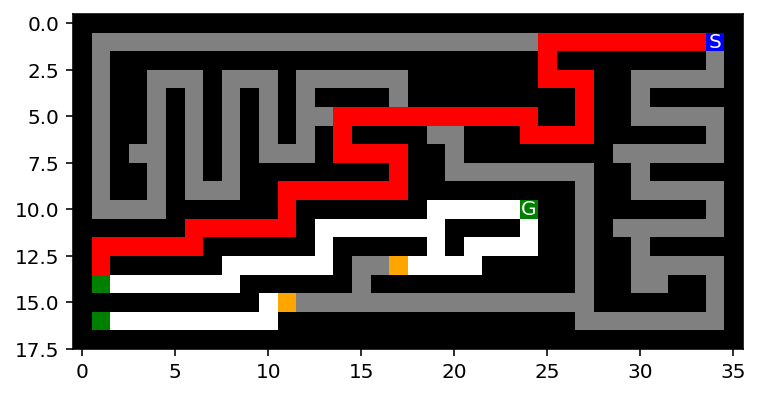
The breadth-first search finds the goal with the lowest cost, at the expense of a larger max tree size and number of expanded nodes
#### Two Sample Depth First Search:
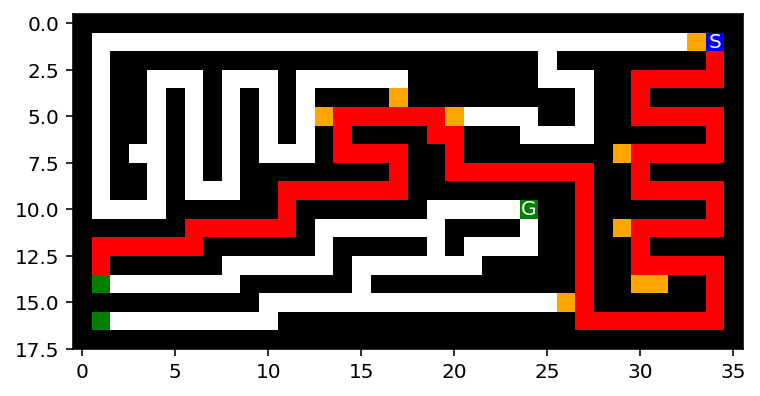
The depth-first search finds one of the goals, but it is not necessarily in the most efficient manner. It has the potential to expand less nodes, and the potential to store a smaller tree in memory.
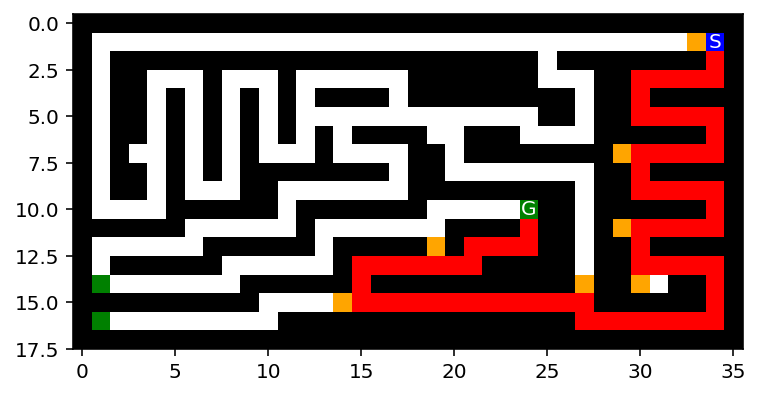
This is the only algorithm that has a potential to find a different goal, since this goal is not optimal.
#### Sample Iterative Deepening Search
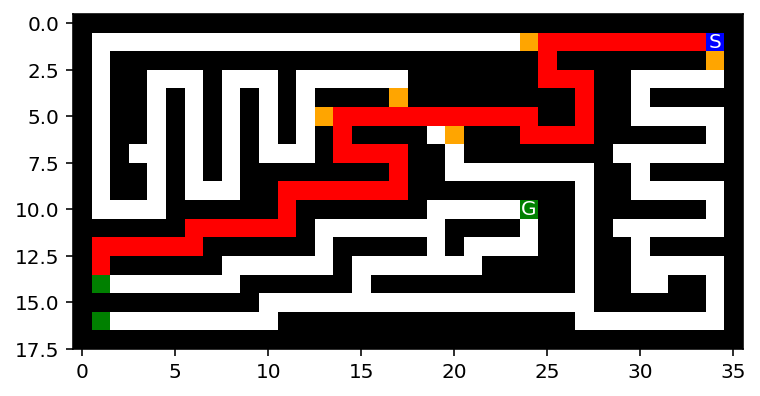
The iterative deepening search finds the optimal route just like the breadth-first search, but it has less nodes stored in memory since each iteration uses a depth-first search.

## More advanced tasks to think about

Instead of defining each square as a state (which you probably did), use only intersections as states. Now the storage requirement is reduced, but the path length between two intersections can be different. If we use total path length in number of squares as path cost, how can we make sure that BFS and iterative deepening search is optimal? Change the code to do so.

Modify your A* search to add weights (see text book) and explore how different weights influence the result.

What happens if the agent does not know the layout of the maze in advance (i.e., faces an unkown, only partially observable environment)? How does the environment look then (PEAS description)? How would you implement a rational agent to solve the maze? What if the agent still has a GPS device to tell the distance to the goal?